<a href="https://colab.research.google.com/github/lwllucas/DS-MachineLearningProjects/blob/master/IT103_Assignment2_Submission_with_Feedback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical Assignment 2 ##

In this assignment, you will be working on a binary classification task: predict if a passenger survive or die in an transport accident.  

Plese answer **ALL** the questions below (Question 1 to 13). You may refer to online documentation (e.g. scikit-learn, pandas, etc) for help on syntax. No copying of codes wholesale is allowed.

_**Note**: Use a random_state = 42 where appropriate_

#### maximum marks = 30 ###

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Question 1** (1 mark)

Load the dataset csv file from https://raw.githubusercontent.com/nyp-sit/sdaai-iti103/master/assignment2/passengerdata.csv and display the first 10 rows of data

_Desription of the data_

|Variable|Definition|Key|
|--|--|--|
|Survived|Survival|0 = No, 1 = Yes|
|Class|Ticket class||
|Sex|Sex||
|Age|Age in years||
|NoSiblingSpouse|# of siblings or spouses onboard||
|NoParentsChildren|# of parents or children onboard ||
|TicketNo|Ticket numer||
|Fare|Passenger fare||
|CabinNo|Cabin number||
|EmbarkationPort|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|



In [ ]:
### START YOUR CODE HERE ###
url = "https://raw.githubusercontent.com/nyp-sit/sdaai-iti103/master/assignment2/passengerdata.csv"
df = pd.read_csv(url)
df.head(10)
### END YOUR CODE HERE ###

,PassengerId,Survived,Class,Name,Sex,Age,NoSiblingSpouse,NoParentsChildren,TicketNo,Fare,CabinNo,EmbarkationPort
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Question 2**  (2 marks)

Inspect the dataframe to see which are categorical values and if there is any missing values. 

After you complete the code in the code cell, answer the following questions here by entering your answers in this markdown cell:

1.  Which are the categorical column(s)? List the column names.  
The column names are (1) Name , (2) Sex, (3) TicketNo, (4) CabinNo, (5) EmbarkationPort, (6) Class (Although class is numerical, we have identified that the different classes are related and hence it would be better to apply one hot encoding to it as well subsequently)
2.  Which columns have missing values? List the column names.  
The column that have null values are (1)Age, (2)CabinNo, (3) EmbarkationPort

In [ ]:
### START YOUR CODE HERE ###
str_cols = df.dtypes == np.object
print(str_cols)
cat_cols = df.columns[str_cols]
print(cat_cols)
print(str(len(cat_cols))+ " columns are categorical")

null_values = [col for col in df.columns if df[col].isnull().any()]
print("Columns that have null values are" + str(null_values))
### END YOUR CODE HERE ###

PassengerId          False
Survived             False
Class                False
Name                  True
Sex                   True
Age                  False
NoSiblingSpouse      False
NoParentsChildren    False
TicketNo              True
Fare                 False
CabinNo               True
EmbarkationPort       True
dtype: bool
Index(['Name', 'Sex', 'TicketNo', 'CabinNo', 'EmbarkationPort'], dtype='object')
5 columns are categorical
Columns that have null values are['Age', 'CabinNo', 'EmbarkationPort']


In [ ]:
print(df['NoParentsChildren'].value_counts())
print()
print()
print(df['NoSiblingSpouse'].value_counts())
print()
print()
print(df['EmbarkationPort'].value_counts())
print()
print()
print(df['Class'].value_counts())
print()
print()
print(df['Sex'].value_counts())
print()
print()
print(f"Range for Age: {df['Age'].min()} <= Age <=  {df['Age'].max()}")
print(f"Range for Fare: {df['Fare'].min()} <= Fare <=  {df['Fare'].max()}")

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: NoParentsChildren, dtype: int64


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: NoSiblingSpouse, dtype: int64


S    644
C    168
Q     77
Name: EmbarkationPort, dtype: int64


3    491
1    216
2    184
Name: Class, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


Range for Age: 0.42 <= Age <=  80.0
Range for Fare: 0.0 <= Fare <=  512.3292


**Question 3** (6 marks)

Encode appropriate categorical features using one-hot-encoding.  You may decide to drop certain categorical features that are not relevant to whether the person survived or not.  

Feedback from Mr Mar: Q3. Maybe better to treat class as ordinal, and not do OHE as the ordering maybe important.. 

In [ ]:
# Check for null values
df.isna().sum()

PassengerId            0
Survived               0
Class                  0
Name                   0
Sex                    0
Age                  177
NoSiblingSpouse        0
NoParentsChildren      0
TicketNo               0
Fare                   0
CabinNo              687
EmbarkationPort        2
dtype: int64

In [ ]:
### START YOUR CODE HERE ###

# I have decided to drop the columns Name, PassengerID, Ticket and Cabin No as these are features which have no relation to the survival rate
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# le = LabelEncoder()
# ohc = OneHotEncoder()
new_df = df.copy()

# # Drop the columns
new_df = new_df.drop(['CabinNo','PassengerId','Name', 'TicketNo'], axis = 1)
new_df = new_df.dropna(subset=['EmbarkationPort', 'Age'])

# Look at the dat types
print(new_df.dtypes)

# Print unique values in the columns
print(new_df['Sex'].unique())
print(new_df['EmbarkationPort'].unique())

str_cols = new_df.dtypes == np.object

print(type(str_cols))
cat_cols = new_df.columns[str_cols]
print(cat_cols)

new_df = pd.get_dummies(new_df, columns =['Class','Sex','EmbarkationPort'])
new_df.head()
### END YOUR CODE HERE ###

Survived               int64
Class                  int64
Sex                   object
Age                  float64
NoSiblingSpouse        int64
NoParentsChildren      int64
Fare                 float64
EmbarkationPort       object
dtype: object
['male' 'female']
['S' 'C' 'Q']
<class 'pandas.core.series.Series'>
Index(['Sex', 'EmbarkationPort'], dtype='object')


,Survived,Age,NoSiblingSpouse,NoParentsChildren,Fare,Class_1,Class_2,Class_3,Sex_female,Sex_male,EmbarkationPort_C,EmbarkationPort_Q,EmbarkationPort_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


**Question 4**  (6 marks)

Formulate your strategy to deal with the missing data.  You may decide to drop the column, fill it with default values, or remove the rows.  Give reasons for the strategy used when dealing with these missing values (write your reasons in the space below 'Answer' in this cell). Then write the codes to deal with missing values in the code cell below.

***Answer***: 

I have decided to drop the rows with missing values and in particular the ones that had missing values were EmbarkationPort and Age. As I needed to do One hot encoding in Question 3, i have decided to drop the missing values before that to prevent Nan values to be formed as part of the one hot encoding and also it is not possible to know the actual values without closely inspecting the names of the passengers. 

<your answer here>


feedback from Mr Mar 
Q4. Probably not to drop missing rows for Age as you would have reduce the dataset signficantly by 177 records. You can infer values for age based on the title of the names, or simply the median age. Unless we have a large dataset, we need to be careful before throwing away samples. 

In [ ]:
### START YOUR CODE HERE ###
### END YOUR CODE HERE ###

**Question 5** (2 marks)

You want to build a model to predict how likely a passenger will survive in the case of train crash.  Create the ```X_train, y_train, X_test, y_test``` from the given dataset.


In [ ]:
### START YOUR CODE HERE ###

# Split the data into independent 'X' and dependent 'Y' Variables
y = new_df.iloc[:, 0].values
# print(y)

X = new_df.iloc[:, 1:13].values
# print(X)

# Split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

print(len(X_train))
print(len(y_train))

print("label counts in train:")
print("1", (y_train == 0).sum())
print("0", y_train.sum())
print()

print("label counts in test:")
print("1", (y_test == 0).sum())
print("0", y_test.sum())
### END YOUR CODE HERE ###

569
569
label counts in train:
1 344
0 225

label counts in test:
1 80
0 63


**Question 6** (2 marks)

Evaluate how well your model will perform (in terms of `accuracy`) with a LogisticRegression classifier using 5-fold cross-validation. For the Logistic Regressor, specify `liblinear` as the solver. 

Calculate the mean validation accuracy. 

In [ ]:
# Scale the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = MinMaxScaler()

num_cols = [0, 1, 2, 3] #Age, Fare

# # apply standardization on numerical features
for i in num_cols:
    # transform the training data column
    X_train[:, i] = sc.fit_transform(np.expand_dims(X_train[:, i], axis=1)).squeeze()
    
    # transform the testing data column
    X_test[:, i] = sc.transform(np.expand_dims(X_test[:, i], axis=1)).squeeze()

In [ ]:
X_train[0, :]

array([0.40939935, 0.2       , 0.33333333, 0.05416439, 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        ])

In [ ]:
### START YOUR CODE HERE ###
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#Use Logistic Regression

lr = LogisticRegression(solver = 'liblinear', random_state = 42)

scores = cross_val_score(lr, X_train, y_train, cv=5, scoring = "accuracy")
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)
### END YOUR CODE HERE ### 


[0.73684211 0.76315789 0.77192982 0.81415929 0.85964912]
0.7891476478807637


**Question 7** (2 marks)

Using 5-fold cross-validation, compute the following: 
- confusion matrix
- precision 
- recall
- f1 score

In [ ]:
### START YOUR CODE HERE 
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(lr, X_train, y_train, cv = 5)

confusion = confusion_matrix(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1_score = f1_score(y_train,y_train_pred)


print("Confusion Matrix")
print(confusion)
print("\nPrecision")
print(precision)
print("\nrecall")
print(recall)
print("\nf1_score")
print(f1_score)
### END YOUR CODE HERE ###  


Confusion Matrix
[[291  53]
 [ 67 158]]

Precision
0.7488151658767772

recall
0.7022222222222222

f1_score
0.7247706422018347


**Question 8**  (3 marks)

Assuming we want to increase the precision score to 0.8, compute the new recall score. Again, use 5-fold cross-validation for your computation. 

In [ ]:
## START YOUR CODE HERE ### 
from sklearn.preprocessing import binarize
threshold = 0.57

lr = LogisticRegression(solver = 'liblinear', random_state = 42)
y_train_pred_new = cross_val_predict(lr, X_train, y_train, cv = 5, method="predict_proba")
y_train_pred_bin = binarize(np.expand_dims(y_train_pred_new[:, 1], axis=1), threshold).squeeze()

confusion_new = confusion_matrix(y_train, y_train_pred_bin)
print(confusion_new)

precision_new = precision_score(y_train, y_train_pred_bin)
recall_new = recall_score(y_train, y_train_pred_bin)

print(precision_new)
print(recall_new)
### END CODE HERE ###


[[311  33]
 [ 85 140]]
0.8092485549132948
0.6222222222222222


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred_bin))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       344
           1       0.81      0.62      0.70       225

    accuracy                           0.79       569
   macro avg       0.80      0.76      0.77       569
weighted avg       0.79      0.79      0.79       569



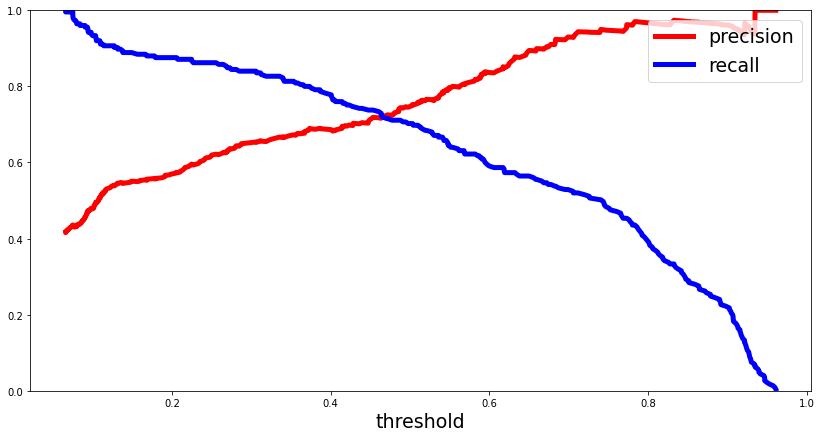

In [ ]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of all 1's
y_train_pred_new = y_train_pred_new[:,1]

precision, recall, threshold = precision_recall_curve(y_train,y_train_pred_new)

def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

**Question 9** (2 marks)

Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate (TPR) against the false postivie rate (FPR).  
- Plot the ROC curve to show the tradeoff between TPR and FPR.
- Calculate the ROC AUC (Area Under Curve) score.

0.8539276485788112


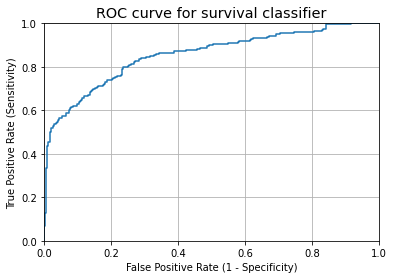

In [ ]:
### START YOUR CODE HERE ###
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_new)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for survival classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

auc = roc_auc_score(y_train,y_train_pred_new)
print(auc)
### END YOUR CODE HERE ###

**Question 10** (2 marks)

Tune your model to find the best performing model. (Hint: you can ALSO try different solver for LogisticRegression)

In [ ]:
### START YOUR CODE HERE ###
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

param_grid = [{'penalty' : ['l1', 'l2'], 'C' : np.logspace(-4, 4, 20), 'solver' : ['liblinear','saga']}]
lg_clf = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc')
lg_clf.fit(X_train, y_train)

lg_clf.best_params_, lg_clf.best_score_
### END YOUR CODE HERE ###

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

({'C': 1.623776739188721, 'penalty': 'l1', 'solver': 'liblinear'},
 0.860771526001705)

**Question 11** (1 marks) 

Assume you are satisfied with your model. Now test your model on the test set. 

1. Calculate your test accuracy 
2. Calculate your train accuracy

Write your code in the following code cell.


In [ ]:
### START YOUR CODE HERE ###
from sklearn.metrics import accuracy_score
# lr = LogisticRegression(penalty = 'l1', c=1.623776739188721, solver = 'liblinear', solver = 'liblinear', random_state = 42)
# lr.fit(X_train, y_train)
# lr.predict(X_test)

# Test accuracy
test_predictions = lg_clf.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(test_accuracy)

# Train accuracy
train_predictions = lg_clf.best_estimator_.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(train_accuracy)

### END YOUR CODE HERE ### 

0.8041958041958042
0.7978910369068541


**Question 12** (1 mark)

Determine if the model is overfitting. Justify your answer.

You can write your answer in the following markdown cell.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

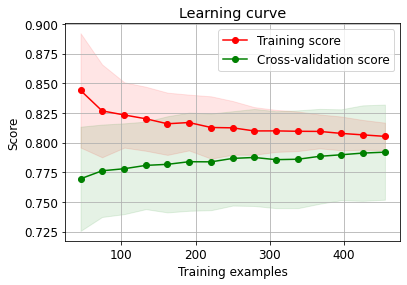

In [ ]:
#Learning curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import validation_curve

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)

# Learning curve
def Learning_curve_model(X, Y, model, cv, train_sizes):

    plt.figure()
    plt.title("Learning curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")


    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
                     
    plt.legend(loc="best")
    return plt

#learn curve
logreg  = LogisticRegression(penalty = 'l1', C=1.623776739188721, solver = 'liblinear', random_state = 42)
train_size=np.linspace(.1, 1.0, 15)
Learning_curve_model(X_train, y_train, logreg, cv, train_size)

**Answer:** 
Based on the learning curve, the model has a good bias variance tradeoff and hence it is not overfitting

**Question 13 (Bonus Question)** (1 marks)

Which one of the features is the most impotant in determining the survival rate?  (Pclass, Age, SibSp, Parch, Fare, Sex, Embarkment). Write your answer in the markdown cell.  You can show your code on how to obtain the answer in the code 
cell below

**Answer**

Feedback from Mr Mar:
Q13. It is difficult to look at the visualization and tells which is the most important factor. A numerical comparisons would be better, e.g. look at the values of coeffs.

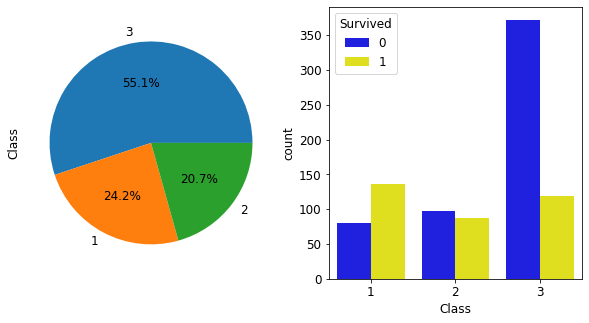

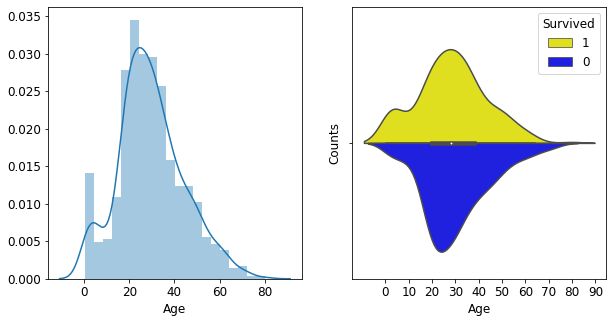

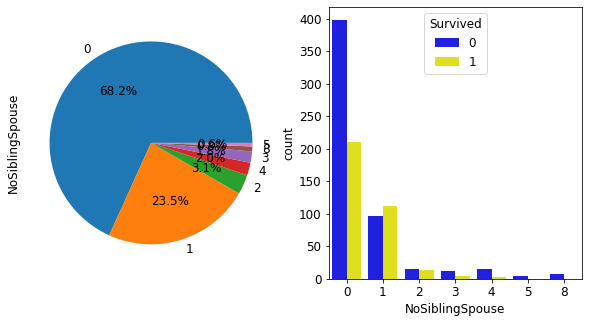

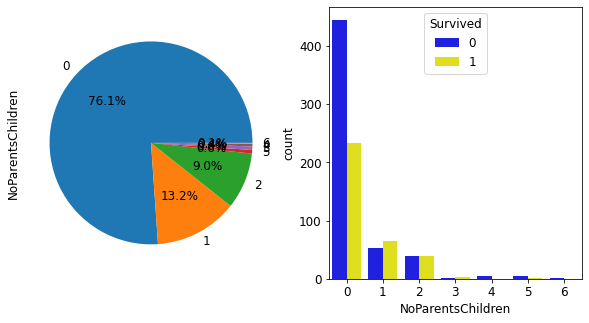

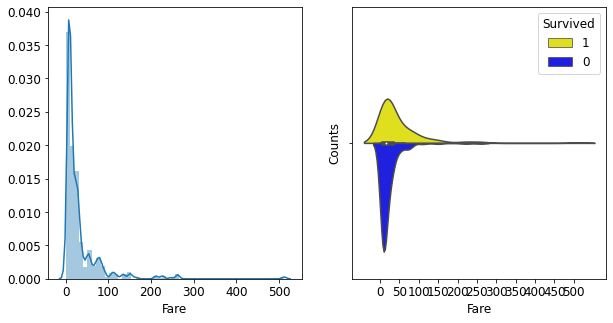

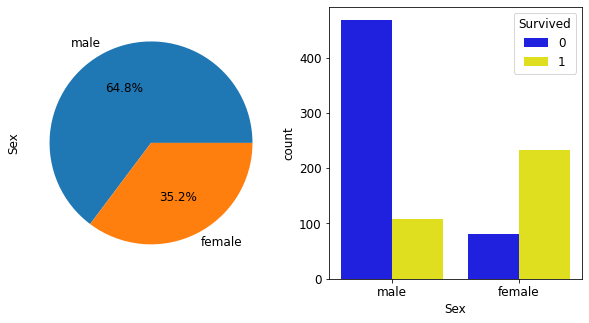

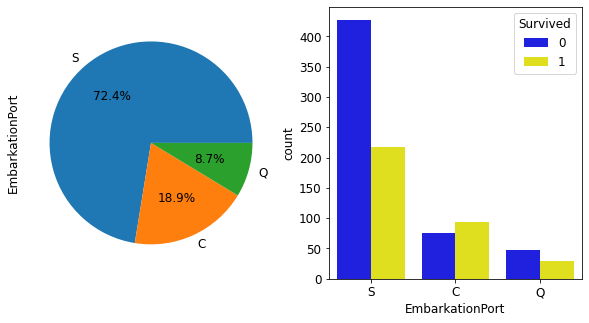

In [ ]:
### START YOUR CODE HERE ###
import seaborn as sns
df = df.copy()

# Color map for visualization
survival_palette = {0: "blue", 1: "yellow"} 

# Class vs survival
cat_plot(df, 'Class','Survived', survival_palette)

# Age vs survival
age_set_no_nan = df[['Age','Survived']].copy().dropna(axis=0)
cont_plot(age_set_nonan, 'Age', 'Survived', survival_palette, [1, 0], range(0,100,10))

#NoSiblingSpouse vs Survival
cat_plot(df, 'NoSiblingSpouse', 'Survived', survival_palette)


#NoParentsChildren vs Survival
cat_plot(df, 'NoParentsChildren','Survived', survival_palette)

#Fare vs Survival
fare_set = df[['Fare','Survived']].copy() 
cont_plot(fare_set, 'Fare', 'Survived', survival_palette, [1, 0], range(0,550,50))

#Sex vs Survival
cat_plot(df, 'Sex','Survived', survival_palette)


#Embarkment vs Survival
cat_plot(df, 'EmbarkationPort','Survived', survival_palette)


### END YOUR CODE HERE ###

##Answer

Looking at the first graph, 

Class vs Survival, we can observed that class 1 has higher survival rate despite only taking up 24.2% of the total and hence it shows class is an important feature that cannot be disregarded

Next, let's look at Age Vs Survival.
Majority of the passengers were around their 20's. We can see that there are more survivors below the age of 20 and there are more people who did not survived between the age of 20 to 40 and it seems like anyone above the age of 70 would not have any chances of survival. Therefore the age seems to play a part in determining your chances of survival 

Then, lets take a look if having sibling and spouse do affect your survival chances. From the graph it appears that people with 1 siblings have a higher chance of survival but and for the graph on NoParents child vs survival , it seems to be the same as well.So having 1 sibling or lesser parents/child has a
higher chance of survivor

Now, lets look at the fare vs survival. 
It appears that there were more survivors on the first part of graph on Fare less than 10. Numbers of person who died peak at around Fare 15 to 35 and gradually reduce as Fare goes higher. This shows that there could be a possibility that paying more increases chances or survival

gender vs survival plot shows that female has a higher chance of survival as compared to male and hence Sex is a important feature

The embarkation port shows that people who embarked on Port C has a higher suvival rate

After looking at the above graph, it appears that Sex and Age seems to be the most important feature as we know that in an emergency like this, we will tend to help the woman and child to get to safety first. So being young and being a female will greatly increase chances of survival
